# Etienne Noroy - Les diamants

Le sujet de mon projet de Machine Learning concernera les diamants.

Comme on le sait les diamants et autres pierres précieuses sont des matériaux naturels sortant de gisements qui sont ensuite vendus à des bijoutiers / joailliers afin de les taillers et d'en faire des pièces d'exceptions.

Bien sur, certaines caractéristiques du diamant font que celui ci sera plus ou moins couteux à l'achat (tailles, couleurs, etc...).

C'est dans ce but que j'aimerai mettre en place un algorithme qui permettra de prédire le prix d'un diamant grâce à certaines de ses caractéristiques d'où ma problématique "Peut-on prévoire avec précision le prix d'un diamant à l'aide de ses caractéristiques intrasèques?".

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

da = pd.read_csv('c:/temp/data/diamonds.csv');
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


On peut voir que chaque diamants à 10 caractéristiques distincts :
- carat : le poids du diamant (1 carat = 0.20g)
- cut : la qualité de la coupe classé de Ideal (meilleure) à Fair (pire). 
- color : la couleur du diamant D (meilleure) à J (pire)
- clarity : la clareté du diamant IF (meilleure), VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (pire)
    - IF : aucune inclusion observée avec une loupe x10. Le diamant est donc "pur à la loupe".
    - VVS1 / VVS2 : minuscules inclusions à peine visibles avec une loupe x10.
    - VS1 / VS2 : très petites inclusions difficilement visibles avec une loupe x10. 
    - SI1 / SI2 : petites inclusions aisément visibles avec un grossissement de 10 fois.
    - I1 : inclusions pratiquement visibles à l'œil nu.
- depth : le pourcentage de profondeur total
- table : la largeur du sommet du losange par rapport au point le plus large.
- price : le prix en dollars américains
- x : la longueur en mm
- y : la largeur en mm 
- z : la profondeur en mm

On peut également voir que toutes les colonnes sont pleines et qu'elles ne contiennent aucune valeur null.

Text(0.5, 1.0, 'Nombre de données par couleur de diamant')

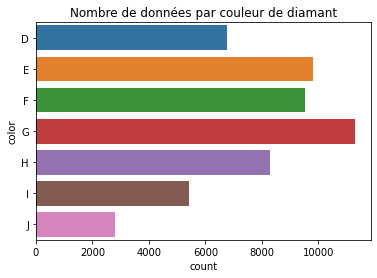

In [2]:
#Schéma des couleurs classé de la meilleure à la pire couleur (D -> J).
color = sns.countplot(y="color", data=da, order=['D','E','F','G','H','I','J'])
color.set_title('Nombre de données par couleur de diamant')

In [3]:
#Vérification du pourcentage de la classe de couleur J par rapport au total des données.
(da['color'] == 'J').value_counts(True)*100

False    94.794216
True      5.205784
Name: color, dtype: float64

On remarque avec le schéma qu'on a une bonne distribution des différentes couleurs de diamants. Certes la classe de couleur J est moins représentée mais elle compte malgré tout plus de 5% des donnés total, je garderai donc cette classe de couleur pour la suite.

Text(0.5, 1.0, 'Nombre de données par rapport à la classe de clarté')

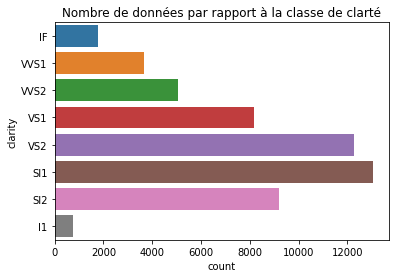

In [4]:
#Schéma des clartés classé de la meilleure à la pire clareté (IF -> I1).
clarity = sns.countplot(y="clarity", data=da, order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
clarity.set_title('Nombre de données par rapport à la classe de clarté')

In [5]:
##Vérification du pourcentage de la classe de clarté IF par rapport au total des données.
(da['clarity'] == 'IF').value_counts(True)*100

False    96.681498
True      3.318502
Name: clarity, dtype: float64

In [6]:
##Vérification du pourcentage de la classe de clarté IF par rapport au total des données.
(da['clarity'] == 'I1').value_counts(True)*100

False    98.626251
True      1.373749
Name: clarity, dtype: float64

On peut voir sur le schéma ci-dessus que les données sont moins bien répartis par rapport à leur clarté. On a une très faible population (1.3%) pour une clarté I1 qui est considéré comme un diamant de pureté médiocre.
On a également une faible population (3.3%) pour une clarté IF qui est considéré comme un diamant pure.
Malgré la faible population de ces deux classes de clarté, je penses qu'il serait intéressant de les garder car ils correspondent à la pureté intrinsèque des diamants et donc on un gros impact sur le prix de vente.
Ici nous avons d'un côté la clarté IF qui correspond à un diamant pure qui n'a aucune imperfection et qui, je pense, aura un impact sur le prix que nous cherchons.
De l'autre côté nous avons la clarté I1 qui correspond à un dimant de pureté médiocre, et qui la aussi aura un impact significatif sur le prix par rapport à une clarté SI2 qui correspond malgré tout à une qualité bien supérieur.

<AxesSubplot:xlabel='count', ylabel='cut'>

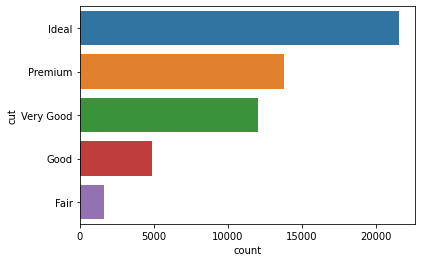

In [7]:
#Schéma des coupes classé de la meilleure à la pire.
sns.countplot(y="cut", data=da,order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])

On peut voir sur ce schéma que l'on a dans l'ensemble plus de bonne coupes de nos diamants que des coupes moyenne.

Minimal price:  326 $
Maximal price:  18823 $


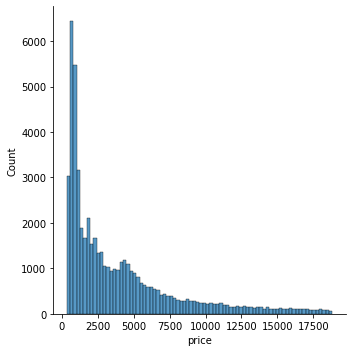

In [8]:
#Graphique de la distribution des prix des pierres précieuses.
sns.displot(x='price', data=da)
print("Minimal price: ", da['price'].min(), '$')
print("Maximal price: ", da['price'].max(), '$')

On voit avec ce schéma que la distribution des prix des pierres est très étendu. On a un prix qui va de 326 dollars à 18823 dollars on remarque que malgré une population plus dense autour de 500 dollars on a quand même un population assez constante d'environ 2000 diamants entre 10000 dollars et 18823 dollars.

<AxesSubplot:xlabel='price'>

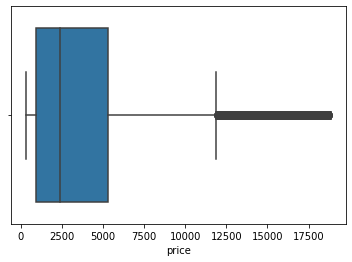

In [9]:
#Boîte à moustache par rapport au prix.
sns.boxplot(x='price', data=da)

Comme on a pu le voir avec le graphique de distribution du prix on a malgré tout une grosse densité de valeur determiné ici comme valeur abérrante du au fait d'une population de prix très étendu.

<AxesSubplot:xlabel='carat'>

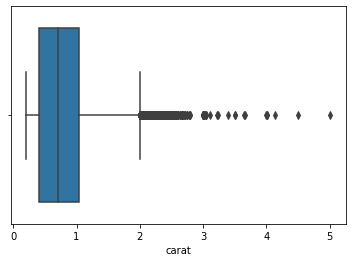

In [10]:
#Boîte à moustache par rapport au carat.
sns.boxplot(x='carat', data=da)

On peut voir avec ce schéma qu'il y a aussi au niveau des valeurs de carat un grand nombre de valeurs abérrantes. Le poids du diamant semble une caractéristique assez importante quand on parle du prix d'un diamant puisqu'elle semble suivre un peu la densité de valeur abérrante du prix.

Text(0, 0.5, 'Prix $')

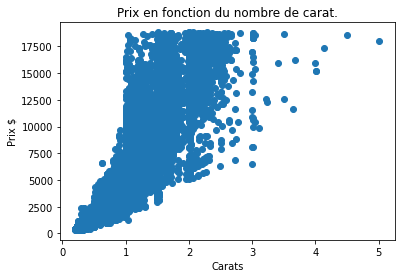

In [28]:
#Graphique du prix en fonction du nombre de carat.
plt.scatter(da.carat, da.price)
plt.title("Prix en fonction du nombre de carat.")
plt.xlabel("Carats")
plt.ylabel("Prix $")

In [11]:
#Définition des variables à utilisés.
y = da['price']
data = da.drop(['price', 'depth', 'table'], axis=1)
X = data
X.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
dtype: int64

Après avoir analysé les différentes caractéristiques j'ai décidé de garder toutes les caractéristiques à part la table et la profondeur qui sont des valeurs résultants de calcul d'autres caractéristiques et je ne penses pas qu'elles apporteront un plus à mon modèle. Et bien sur concernant ma prédiction je prends le prix comme y.
On peut voir que je n'ai pas de donnée null dans mes features et donc que je ne serais pas embêté par cela.

X.info()

In [12]:
#Transformation de mes variables catégories en int (coupe, couleur et clarté).
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
X['cut'] = lb.fit_transform(X['cut'])
X['color'] = lb.fit_transform(X['color'])
X['clarity'] = lb.fit_transform(X['clarity'])
X.head()

,carat,cut,color,clarity,x,y,z
0,0.23,2,1,3,3.95,3.98,2.43
1,0.21,3,1,2,3.89,3.84,2.31
2,0.23,1,1,4,4.05,4.07,2.31
3,0.29,3,5,5,4.20,4.23,2.63
4,0.31,1,6,3,4.34,4.35,2.75


J'ai transformé mes données catégorisés afin de pouvoir les utilisés en tant que feature.

In [13]:
#Mise en place du split des données pour mettre ne place la partie training et la partie testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Je mets en place l'éclatement des données afin de créer des données pour le testing et d'autres pour le training. Ici 40% des données seront pour le testing et 60% pour le training.
Au niveau de mon modèle, comme le prix que je veux prédire est une variable quantitative, je dois utilisé un modèle de régression linéaire. 
J'ai donc opté pour deux modèles :
- Dans un premier temps je vais faire un regression linéaire multiple simple afin de voir si mon modèle pourrait correspondre à cela.
- Dans un second temps, j'utiliserais un autre modèle suivant les résultats de la régression linéaire.

In [45]:
#Création de l'objet linear regression.
#Entrainement du modèle en utilisants les données d'entrainement.
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

lr = linear_model.LinearRegression().fit(X_train, y_train)
coef = lr.coef_
print('Coefficients beta_j : \n', coef)
columns = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']

Coefficients beta_j : 
 [10504.54502943    74.80969189  -268.44011493   299.68106605
  -865.34973082    70.10797319  -286.85998046]


<AxesSubplot:>

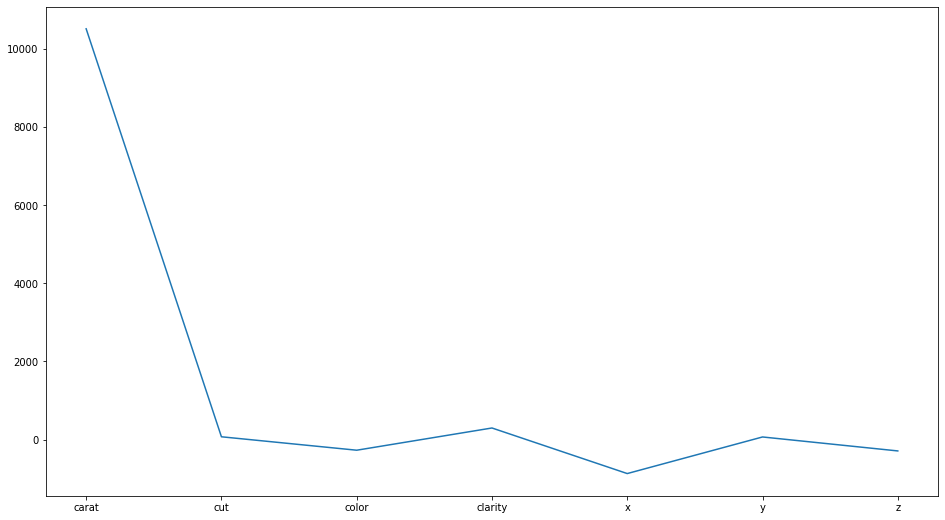

In [46]:
plt.figure(figsize=(16, 9))
coef = pd.Series(coef, columns)
sns.lineplot(x=coef.index, y=coef)

On peut voir sur le graphique ci-dessus que la feature qui semble la plus importante en ce qui concerne le prix d'un diamant est son poids (carat) ce qui semble à première vu assez logique.

In [52]:
#Prediction du y avec les données de tests.
Y_pred = regr.predict(X_test)

In [54]:
print ('Score de variance : %.3f' % r2_score(y_test, Y_pred))

Score de variance : 0.882


On peut donc voir que notre modèle à un score de variance de 88,2 %. Ce qui est en soit un score plutôt correcte pour un modèle aussi simple.
Dans ce cas on peut voir que le coefficient de la feature carat à un gros impacte sur le modèle, il est donc judicieux d'essayer d'utiliser un modèle Lasso puisque il y a une grosse corrélation entre le prix et le poids.

In [108]:
#Mise en place du modèle Lasso avec une constante alpha égale à 0.2.
#Entrainement du modèle en utilisants les données d'entrainement.
lasso = linear_model.Lasso(alpha=0.2, normalize=True)
lasso.fit(X_train, y_train)
coef = lasso.coef_
print(coef)

[8127.02133236   38.47877415 -227.73395452  282.28204219   -0.
   -0.           -0.        ]


On voit ici qu'avec une constante alpha à 0.2, on obtient toujours un coefficient beaucoup plus élevé pour la feature carat que pour toutes les autres features.

<AxesSubplot:>

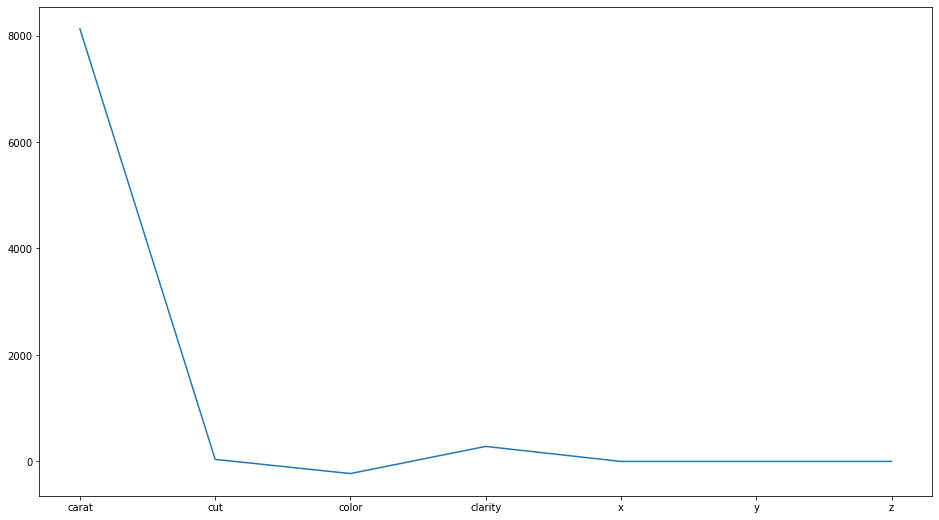

In [109]:
#Graphique des différents coefficients des features impactants le prix d'un diamant.
plt.figure(figsize=(16, 9))
coef = pd.Series(coef, columns)
sns.lineplot(x=coef.index, y=coef)

Avec cette correction on voit que la clarté et la couleur ont un très léger impacte sur le prix du diamant contrairement au carat.

In [110]:
print ('Score de variance : %.3f' % r2_score(y_test, lasso.predict(X_test)))

Score de variance : 0.881


On a un score de 88.1% ce qui est sensiblement égale à ce que nous avons eu avec une simple régression linéaire, ce qui veut dire que le modèle n'est pas forcément plus optimisé pour cette étude.

In [111]:
#Mise en place du modèle Lasso avec une constante alpha égale à 2.
#Entrainement du modèle en utilisants les données d'entrainement.
lasso1 = linear_model.Lasso(alpha=2, normalize=True)
lasso1.fit(X_train, y_train)
coef1 = lasso1.coef_
print(coef1)

[6909.66205793    0.           -0.            7.39257421    0.
    0.            0.        ]


On voit maintenant qu'avec une constance multiplié par 10 que toutes les features sont à 0 ce qui veut dire deux choses, que seul la caractéristique carat à vraiment un impacte sur le prix et que les features n'ont pas de corrélations entre elles.

<AxesSubplot:>

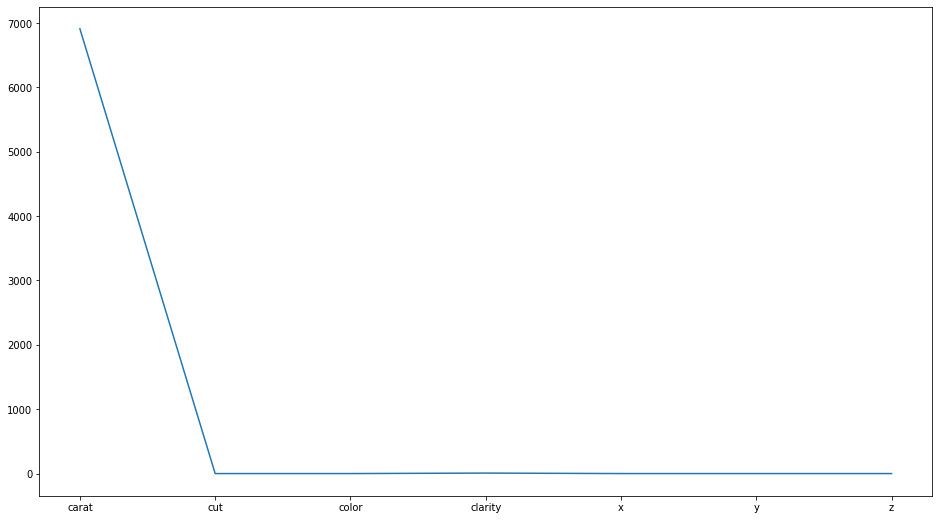

In [112]:
#Graphique des différents coefficients des features impactants le prix d'un diamant.
plt.figure(figsize=(16, 9))
sns.lineplot(x=coef.index, y=coef1)

In [113]:
print ('Score de variance : %.3f' % r2_score(y_test, lasso1.predict(X_test)))

Score de variance : 0.845


On a maintenant une variance de 84.5% avec alpha = 2, ce qui veut dire que plus on diminue l'impacte de la caractéristique carat plus on s'éloigne de la bonne prédiction.

****************************

## Conclusion

Ainsi grâce à ces deux modèles de régression, on a pu remarquer que la caractéristique la plus importante dans la prédiction du prix d'un diamant était son poids (carat). On a eu une variance de 0.88 en ce qui concerne la prédiction du prix avec les deux modèles ce qui reste malgré tout correct.

Il serait interessant de vérifier avec un autre autre modèle de regression comme par exemple le RidgeRegression pour voir si on arrive à meix correspondre à notre courbe et ainsi avoir une meilleur prédiction. Il serait peut être aussi bien de regarder avec un modèle de type SGD Regressor parce que, d'après les différents estimateurs les mieux adaptés de scikit-learn, il serait préférable de l'utiliser si on a en dessous de 100k données.